In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("dji.csv")
train.head()

,date,anger_score,disgust_score,fear_score,joy_score,sadness_score,anger_count,disgust_count,fear_count,joy_count,sadness_count,count,close,open,high,low,change
0,20110411,23.678598,1.862068,3.365532,129.260966,22.046661,28,2,4,150,26,1000,12381.11,12380.43,12476.93,12319.35,0.0001
1,20110412,23.436641,1.568504,1.807040,110.107599,28.552481,28,2,2,128,33,1000,12263.58,12381.04,12381.04,12185.09,-0.9500
2,20110413,17.595715,3.441165,3.351268,103.535217,17.206766,21,4,4,121,21,1000,12270.99,12263.73,12372.94,12203.63,0.0006
3,20110414,16.065135,4.921378,5.183304,102.417106,15.457086,19,6,6,121,18,1000,12285.15,12270.24,12332.71,12137.98,0.0012
4,20110415,16.869910,1.555661,3.334624,121.630811,14.709462,20,2,4,141,18,1000,12341.83,12285.45,12402.61,12238.34,0.0046


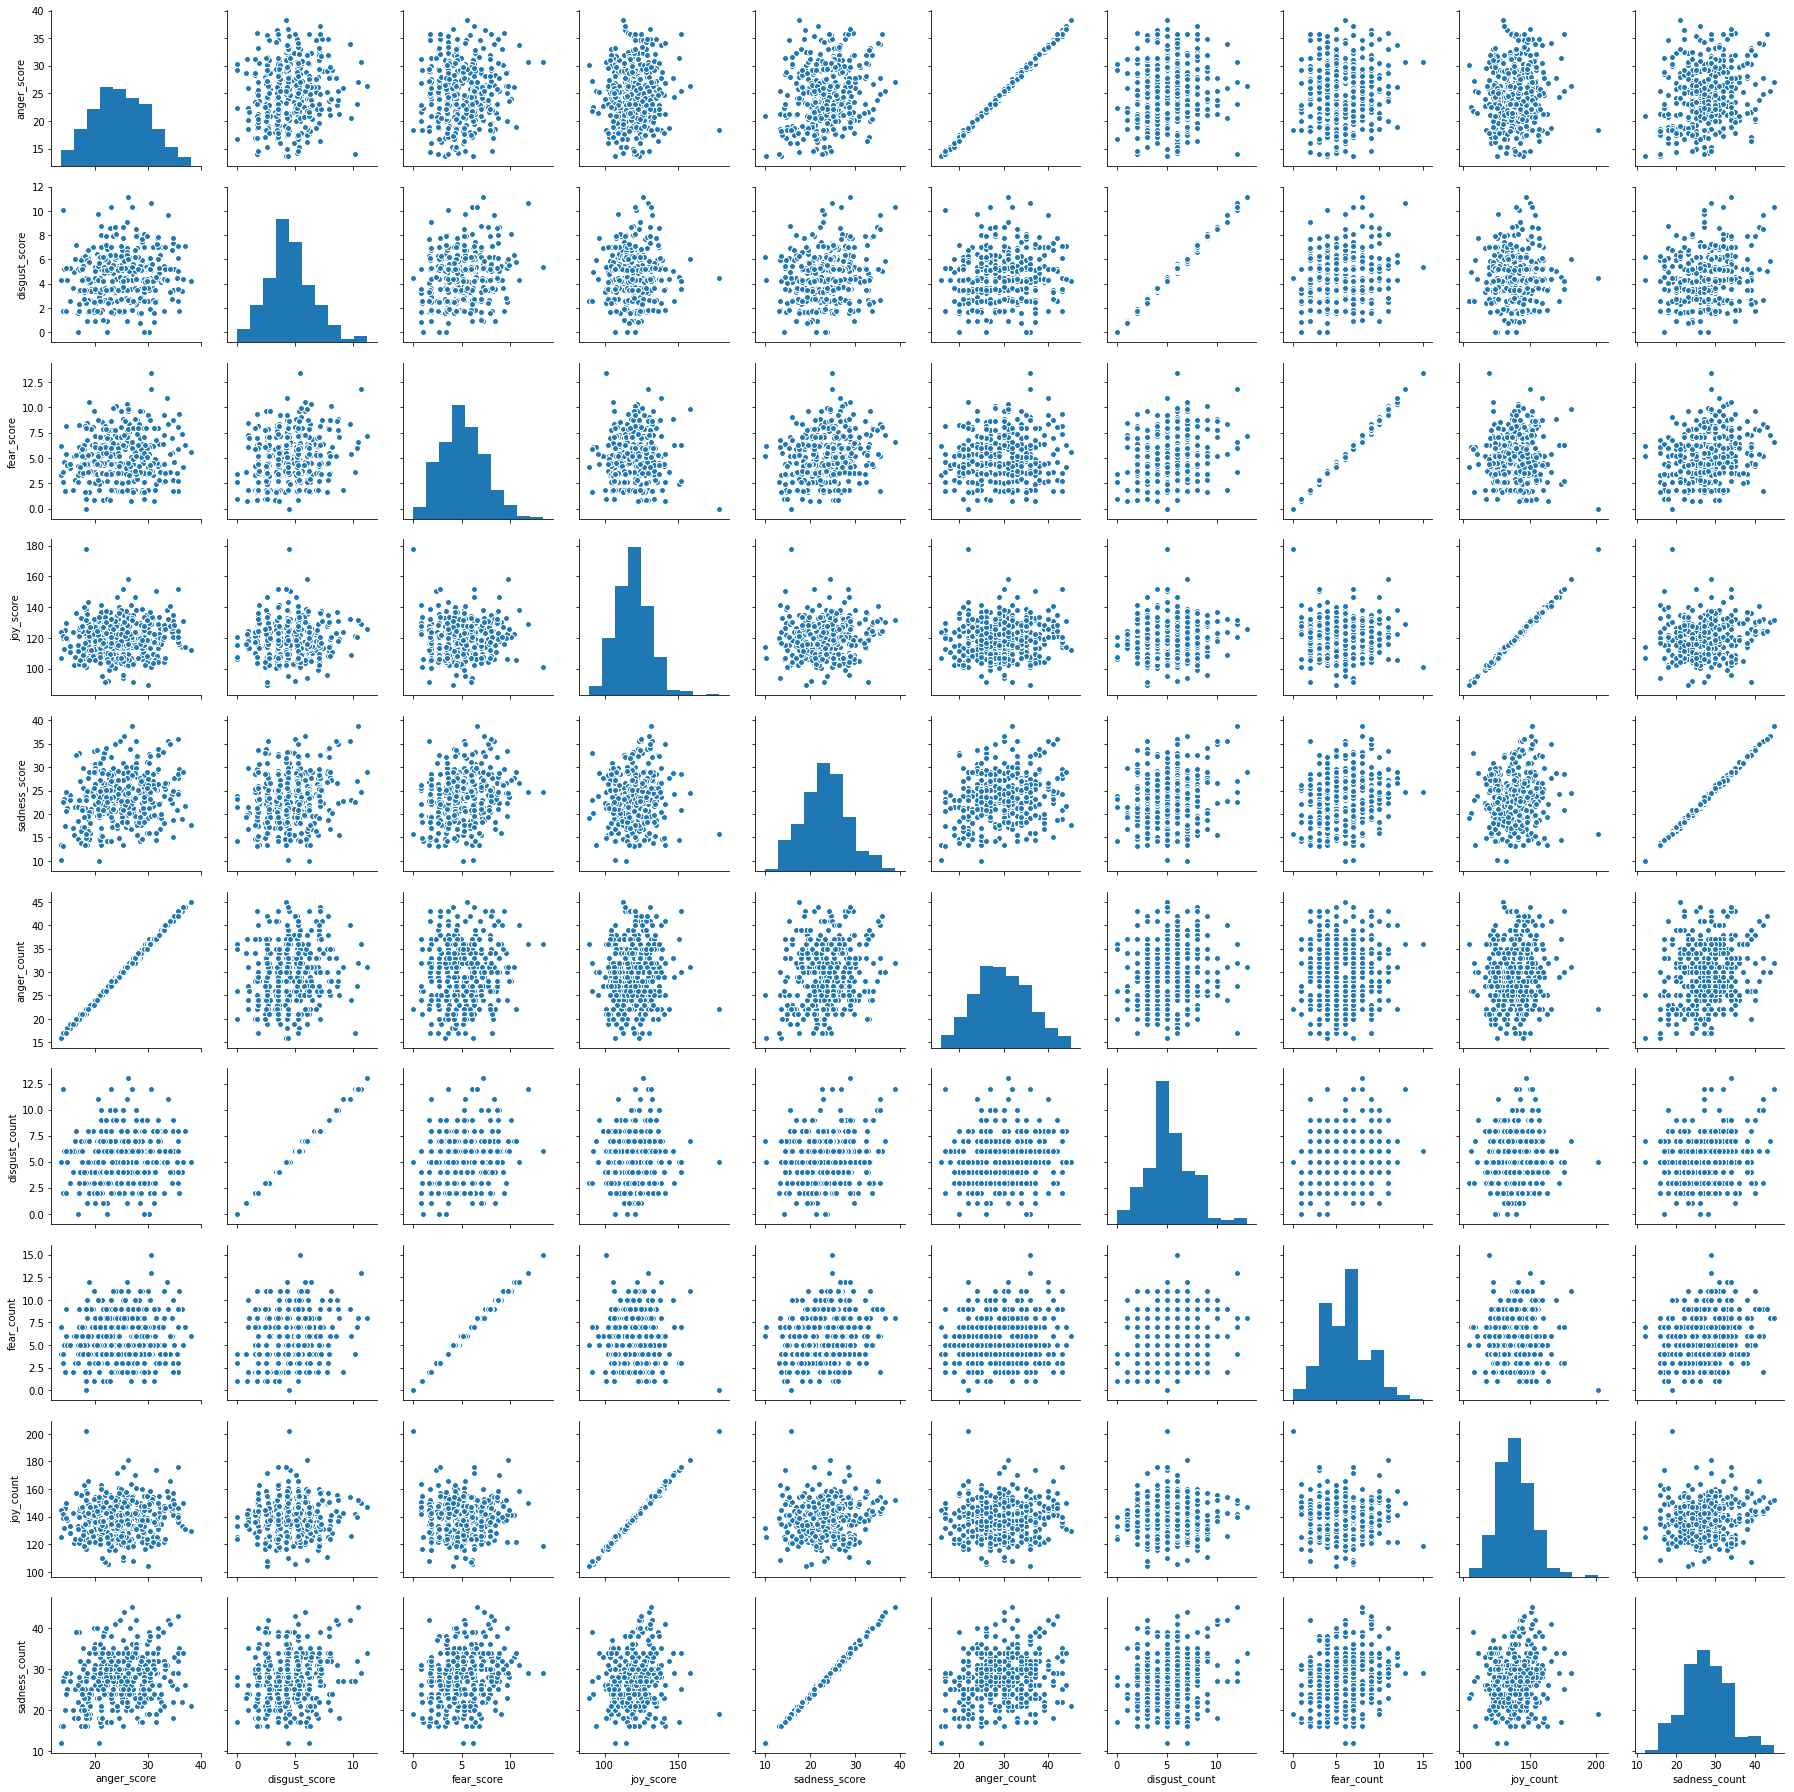

In [7]:
sns.pairplot(vif_test)

In [ ]:
#딱 보기만해도 score 변수와 count 변수 사이에 다중공선성검사가 필요해보임(Variation Inflation Factor)
#왜 필요하느냐?
#한 열이 다른 열에 영향을 미칠 경우(선형에 가까울 경우)
#한 열은 다른 열의 상수배로 표현 가능하므로 여러가지의 식을 만들어 버릴 수 있음.

vif_test = train.iloc[:,1:11]
vif_test.head()

In [15]:
vif_test.values[0]

array([ 23.678598,   1.862068,   3.365532, 129.260966,  22.046661,
        28.      ,   2.      ,   4.      , 150.      ,  26.      ])

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(vif_test.values, i) for i in range(vif_test.shape[1])]
vif["features"] = vif_test.columns

In [21]:
#대략 10 이상일경우 공선성 보임.(2.5 이상부터 유의함)
vif[[vif.columns[1],vif.columns[0]]]

,features,VIF Factor
0,anger_score,8126.133225
1,disgust_score,1288.155590
2,fear_score,1240.842440
3,joy_score,20485.812691
4,sadness_score,6078.403146
5,anger_count,8059.178731
6,disgust_count,1281.824003
7,fear_count,1237.743801
8,joy_count,20686.040771
9,sadness_count,6068.320259


In [ ]:
#방법1 어느쪽이 label과 더 correlation이 있는지 보고 score를 빼든 count를 빼든 함.
#방법2 PCA 분석을 통해 뽑아냄. 이것도 나쁘지않을듯.(label에 어떤 변수를 쓸지 아예 골라버리기.)

In [ ]:
#https://stats.stackexchange.com/questions/168622/why-is-multicollinearity-not-checked-in-modern-statistics-machine-learning
#하지만 traditional statistics 에서나 중요했지 지금은 변수의 normalization 등이 훨씬 중요